## Horses Or Humans

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1I2aWD5twJdrq0SI2QD91HB5zCvvvCE_i">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

# The Horses Or Humans Dataset

This dataset contains 500 CGI images of horses and 500 CGI images of humans.

Horse (class 0)
Human (class 1)

We want to train a machine learning model to classify examples as either horse or human based on the images.
![title](horses_or_humans.png)

## Loading

In [17]:
(ds_train, ds_test), ds_info = tfds.load('horses_or_humans', split=['train', 'test'], shuffle_files=True, as_supervised=False, with_info =True)

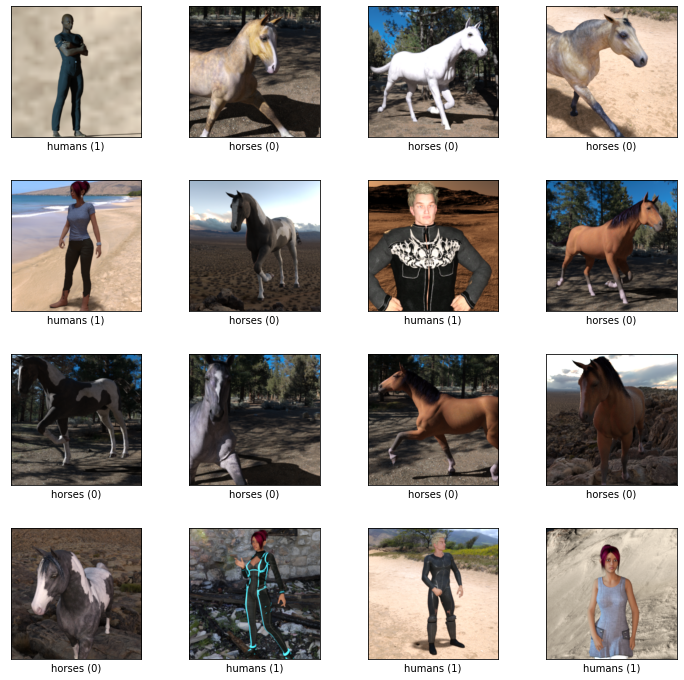

tfds.core.DatasetInfo(
    name='horses_or_humans',
    full_name='horses_or_humans/3.0.0',
    description="""
    A large set of images of horses and humans.
    """,
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    data_path='C:\\Users\\David\\tensorflow_datasets\\horses_or_humans\\3.0.0',
    download_size=153.59 MiB,
    dataset_size=153.53 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=256, num_shards=1>,
        'train': <SplitInfo num_examples=1027, num_shards=2>,
    },
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-humans-dataset"
    }""",
)


In [18]:
fig = tfds.show_examples(ds_train, ds_info, rows=4, cols=4)
print(ds_info)

## Preparing

In [10]:
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 64
ds_train = ds_train.map(normalize_img, num_parallel_calls = AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits["train"].num_examples)
ds_train = ds_train.batch(BATCH_SIZE)
ds_train = ds_train.prefetch(AUTOTUNE)

ds_test = ds_test.map(normalize_img, num_parallel_calls = AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.prefetch(AUTOTUNE)

## Training

In [11]:
model = keras.Sequential(
    [
        keras.Input((300, 300, 3)),
        layers.Conv2D(32, 3, activation="relu"),
        layers.Flatten(),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

model.compile(
    optimizer=keras.optimizers.Adam(0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)

model.fit(ds_train, epochs=5, verbose=2)

Epoch 1/5
17/17 - 15s - loss: 21.7280 - accuracy: 0.5268 - 15s/epoch - 893ms/step
Epoch 2/5
17/17 - 15s - loss: 2.0600 - accuracy: 0.8403 - 15s/epoch - 859ms/step
Epoch 3/5
17/17 - 15s - loss: 0.0337 - accuracy: 0.9864 - 15s/epoch - 855ms/step
Epoch 4/5
17/17 - 15s - loss: 0.0029 - accuracy: 1.0000 - 15s/epoch - 858ms/step
Epoch 5/5
17/17 - 15s - loss: 8.4848e-04 - accuracy: 1.0000 - 15s/epoch - 877ms/step


## Evaluation

In [6]:
model.evaluate(ds_test)

2/2 [==============================] - 2s 659ms/step - loss: 3.2237 - accuracy: 0.6758


[3.2236876487731934, 0.67578125]